## Best Practices in Pandas: Lessons Learned from Answering On

<img style="float: left;" src="IMAGES/StackOverflow.png">

### Parfait Gasana
ChiPy, Data SIG 05/29/2018

## What is StackOverflow?

- Programming Q/A site launched September 15, 2008 created by [Jeff Atwood](https://stackoverflow.com/users/1/jeff-atwood) and [Joel Spolsky](https://stackoverflow.com/users/4/joel-spolsky)
- Built as an *open* alternative to Q/A tech sites such as Experts Exchange
  - *"Stackoverflow is sort of like the anti-experts-exchange meets Wikipedia meets programming Reddit."*
  
- Reconceptualized [forum](https://stackoverflow.com/tour) based original post and answering without long scrolling or back and forth threading
- Uses tags to organize questions in various categories for easy search and filter
  - Tags usually include languages (C#, Java, Python among most popular) and frameworks and modules (i.e., pandas) 
- Fosters a gaming style with awarded points and badges to various milestones 
- Rigorous, engaged community with moderators voted by users
- Due to popularity becomes flagship site in StackExchange network: https://stackexchange.com/sites#


## Quick Stats 
** From Query StackOverflow: <br/>
http://data.stackexchange.com/stackoverflow/query/851060/quick-stats-on-users-questions-answers-comments-count **

In [1]:
import pandas as pd
import numpy as np

stackoverflow_stats = pd.read_csv('DATA/StackOverflow_QueryResults.csv')

In [2]:
stackoverflow_stats.apply(lambda col: col.apply(lambda x: "{:,}".format(x)))

,UserCount,QuestionsCount,CommentsCount,AnswersCount,AcceptedAnswersCount
0,"8,852,907","40,530,764","66,127,595","24,578,779","8,454,080"


## Pandas tag
- [~70K tagged](https://stackoverflow.com/questions/tagged/pandas) questions
- Top users: [@jezrael](https://stackoverflow.com/users/2901002/jezrael), [@Andy Hayden](https://stackoverflow.com/users/1240268/andy-hayden), [EdChum](https://stackoverflow.com/users/704848/edchum), [piRSquared](https://stackoverflow.com/users/2336654/pirsquared), [unutbu](https://stackoverflow.com/users/190597/unutbu)
- [@Parfait](https://stackoverflow.com/users/1422451/parfait): silver badge in python, bronze badge in pandas

  <img style="float: left;" src="IMAGES/StackOverflow_Pandas_TopUsers.png">
  <img style="float: left; width: 650px" src="IMAGES/StackOverflow_@Parfait.png">

<br/>

### *"Most questions are more about processing than programming"* -Parfait

### [How much research effort is expected of Stack Overflow users?](https://meta.stackoverflow.com/a/261593/1422451)

***
## Best Practices / Guidelines / Use Cases

## Set up reproducible examples
- ** Avoid the [XY Problem](https://meta.stackexchange.com/questions/66377/what-is-the-xy-problem) and "telling" co-workers, teammates, the problem to be troubleshooted. **
- ** Instead, set up a small randomized example to easily from larger context and "show" error/undesired result. **

### [How to make good reproducible pandas examples?](https://stackoverflow.com/q/20109391/1422451)
**([How to make a great R reproducible example?](https://stackoverflow.com/questions/5963269/how-to-make-a-great-r-reproducible-example)**

In [3]:
# DEMO DATAFRAME OF 50 COLUMNS

np.random.seed(5292018)
demo_df = pd.DataFrame({'date': np.random.choice(pd.date_range('2018-01-01', '2018-05-23', freq='D'), 50),
                        'analysis_tool': np.random.choice(['pandas', 'r', 'julia', 'sas', 'stata', 'spss'],50),              
                        'database': np.random.choice(['postgres', 'mysql', 'sqlite', 'oracle', 'sql server', 'db2'],50), 
                        'os': np.random.choice(['windows 10', 'ubuntu', 'mac os', 'android', 'ios', 'windows 7', 'debian'],50), 
                        'num1': np.random.randn(50)*100,
                        'num2': np.random.uniform(0,1,50),                   
                        'num3': np.random.randint(100, size=50),
                        'bool': np.random.choice([True, False], 50)
                       },
                        columns=['date', 'analysis_tool', 'num1', 'database', 'num2', 'os', 'num3', 'bool']
          )

In [4]:
demo_df.head(20)

,date,analysis_tool,num1,database,num2,os,num3,bool
0,2018-02-02,julia,-80.809133,sql server,0.802394,android,65,True
1,2018-05-13,stata,-151.799273,db2,0.733028,ios,7,False
2,2018-05-07,julia,-260.442372,sql server,0.624550,windows 7,72,True
3,2018-01-07,spss,118.412725,sql server,0.108483,windows 7,13,True
4,2018-03-19,spss,-5.926350,mysql,0.776017,ubuntu,75,False
5,2018-01-01,pandas,-147.378978,db2,0.284513,debian,59,True
6,2018-03-09,pandas,84.525485,sql server,0.419493,windows 7,51,True
7,2018-02-09,julia,124.871317,sql server,0.538567,ios,42,False
8,2018-03-01,sas,149.028167,sqlite,0.030791,android,73,True
9,2018-01-27,spss,55.330266,sqlite,0.631925,android,60,False


***
## Use containers for similar structures
- ** Avoid holding many similar structured objects (i.e., dataframes) in separate variables flooding your global environment. **
- ** Instead, use containers like dicts and lists. **


```
# LINE BY LINE ASSIGNMENT
df1 = pd.read_csv('/path/to/data1.csv')
df2 = pd.read_csv('/path/to/data2.csv')
df3 = pd.read_csv('/path/to/data3.csv')

# ITERATIVE ASSIGNMENT
files = ['data1.json','data2.json','data3.json']

for file_name in files:
    var_name = file_name.split('.')[0][2:]
    with open(file_name, 'r') as f:
        data = json.load(f)
        
    globals()['df_{}'.format(var_name)] = pd.DataFrame(data)
```

In [5]:
# SAVE ITERATIVELY IN CONTAINER
df_dict = {}

for g in demo_df.groupby('analysis_tool'):
    df_dict[g[0]] = g[1].reset_index(drop=True)

In [6]:
df_dict['pandas'].describe()   

,num1,num2,num3
count,14.000000,14.000000,14.000000
mean,-26.706063,0.438107,50.642857
std,111.001591,0.240137,28.532322
min,-194.989528,0.049702,2.000000
25%,-98.892598,0.285937,28.000000
50%,-54.453737,0.383158,56.500000
75%,45.289531,0.547127,73.250000
max,220.204327,0.878259,87.000000


In [7]:
df_dict['r'].head()

,date,analysis_tool,num1,database,num2,os,num3,bool
0,2018-05-21,r,-56.021303,oracle,0.797842,windows 10,8,True
1,2018-03-02,r,-33.395476,sqlite,0.419473,android,74,False
2,2018-04-10,r,-104.030615,postgres,0.238031,ios,73,False
3,2018-03-23,r,25.678976,db2,0.592432,debian,99,True
4,2018-01-31,r,-164.515717,mysql,0.114143,windows 10,39,True


In [8]:
df_dict['julia'].groupby('database').agg('sum')

,num1,num2,num3,bool
database,,,,
db2,-51.683687,1.276695,79,1.0
mysql,-37.389376,0.277813,3,0.0
postgres,-15.530212,1.262109,130,3.0
sql server,-318.833453,2.240951,218,2.0


***
## Do NOT Expand Objects in Loop
- ** Avoid memory-resources of execessive copying when expanding objects in loops **
- ** Instead, use containers like dicts and lists and then concatenate or join outside of loop. **

** https://stackoverflow.com/a/36489724/1422451 -@unutbu **

```
# ITERATIVELY BUILD MASTER DATAFRAME
df = pd.DataFrame()

for i in os.walk('/path/to/data'):
   df.append(pd.read_csv(os.path.join('/path/to/data', i)))
```

In [9]:
# SAVE ITERATIVELY IN CONTAINER
df_dict = {}

for g in demo_df.groupby('analysis_tool'):
    df_dict[g[0]] = g[1].reset_index(drop=True)
    
# CONCATENTATE WITH CONTAINER OUTSIDE LOOP
final_df = pd.concat(df_dict, ignore_index=True)

final_df.head(20)

,date,analysis_tool,num1,database,num2,os,num3,bool
0,2018-02-02,julia,-80.809133,sql server,0.802394,android,65,True
1,2018-05-07,julia,-260.442372,sql server,0.624550,windows 7,72,True
2,2018-02-09,julia,124.871317,sql server,0.538567,ios,42,False
3,2018-01-16,julia,13.863508,db2,0.770288,ubuntu,18,True
4,2018-01-10,julia,14.060413,postgres,0.196518,windows 7,59,True
5,2018-04-12,julia,-65.547195,db2,0.506407,android,61,False
6,2018-03-03,julia,-102.453265,sql server,0.275440,android,39,False
7,2018-01-28,julia,-37.389376,mysql,0.277813,android,3,False
8,2018-04-30,julia,63.369345,postgres,0.073218,android,37,True
9,2018-01-12,julia,-92.959970,postgres,0.992373,ios,34,True


***
## Understand import handlers (DataFrame and read_table)
- ** Avoid added steps of data cleaning after import of data source. **
- ** Instead, use all available arguments of these methods to handle indexing/dates/types/columns at the source. **



In [10]:
dict_to_df = pd.DataFrame({'C++': ['computing', 99.6],
                           'C': ['computing', 99.9],
                           'Java': ['application', 100],
                           'C#': ['application', 91.8],
                           'Python': ['application', 95.8],
                           'PHP': ['web', 84.5],
                           'Perl': ['web', 66.9],
                           'R': ['computing', 84.7],
                           'Ruby': ['web', 75.3],
                           'VB.NET': ['application', 63.4],
                           'Javascript': ['web', 83],
                           'Matlab': ['computing', 72.4]
                          })
dict_to_df

,C,C#,C++,Java,Javascript,Matlab,PHP,Perl,Python,R,Ruby,VB.NET
0,computing,application,computing,application,web,computing,web,web,application,computing,web,application
1,99.9,91.8,99.6,100,83,72.4,84.5,66.9,95.8,84.7,75.3,63.4


In [11]:
# TRANSFORMING INTO LONG FORMAT
dict_to_df\
    .T\
    .sort_values(1, ascending=False)\
    .reset_index()\
    .rename(columns={'index':'language', 0:'uses', 1:'ranking'})

,language,uses,ranking
0,Java,application,100
1,C,computing,99.9
2,C++,computing,99.6
3,Python,application,95.8
4,C#,application,91.8
5,R,computing,84.7
6,PHP,web,84.5
7,Javascript,web,83
8,Ruby,web,75.3
9,Matlab,computing,72.4


In [12]:
list_to_df = pd.DataFrame([['C++', 'computing', 99.6],
                           ['C', 'computing', 99.9],
                           ['Java', 'application', 100],
                           ['C#', 'application', 91.8],
                           ['Python', 'application', 95.8],
                           ['PHP', 'web', 84.5],
                           ['Perl', 'web', 66.9],
                           ['R', 'computing', 84.7],
                           ['Ruby', 'web', 75.3],
                           ['VB.NET', 'application', 63.4],
                           ['Javascript', 'web', 83],
                           ['Matlab', 'computing', 72.4]])

list_to_df

,0,1,2
0,C++,computing,99.6
1,C,computing,99.9
2,Java,application,100.0
3,C#,application,91.8
4,Python,application,95.8
5,PHP,web,84.5
6,Perl,web,66.9
7,R,computing,84.7
8,Ruby,web,75.3
9,VB.NET,application,63.4


In [13]:
# RENAMING COLUMNS AND SORTING

(list_to_df.rename(columns={0:'language', 1:'uses', 2:'ranking'})
          .sort_values('ranking', ascending=False)
          .reset_index(drop=True)
)

,language,uses,ranking
0,Java,application,100.0
1,C,computing,99.9
2,C++,computing,99.6
3,Python,application,95.8
4,C#,application,91.8
5,R,computing,84.7
6,PHP,web,84.5
7,Javascript,web,83.0
8,Ruby,web,75.3
9,Matlab,computing,72.4


In [14]:
mat_to_df = pd.DataFrame(np.matrix([['C++', 'computing', '99.6'],
                                    ['C', 'computing', '99.9'],
                                    ['Java', 'application', '100'],
                                    ['C#', 'application', '91.8'],
                                    ['Python', 'application', '95.8'],
                                    ['PHP', 'web', '84.5'],
                                    ['Perl', 'web', '66.9'],
                                    ['R', 'computing', '84.7'],
                                    ['Ruby', 'web', '75.3'],
                                    ['VB.NET', 'application', '63.4'],
                                    ['Javascript', 'web', '83'],
                                    ['Matlab', 'computing', '72.4']], dtype='str'))

mat_to_df

,0,1,2
0,C++,computing,99.6
1,C,computing,99.9
2,Java,application,100
3,C#,application,91.8
4,Python,application,95.8
5,PHP,web,84.5
6,Perl,web,66.9
7,R,computing,84.7
8,Ruby,web,75.3
9,VB.NET,application,63.4


In [15]:
# RENAMING COLUMNS, SORTING, AND CONVERTING TYPE

mat_to_df = mat_to_df.rename(columns={0:'language', 1:'uses', 2:'ranking'})
mat_to_df.assign(ranking=mat_to_df['ranking'].astype(float))\
         .sort_values('ranking', ascending=False)\
         .reset_index(drop=True)

,language,uses,ranking
0,Java,application,100.0
1,C,computing,99.9
2,C++,computing,99.6
3,Python,application,95.8
4,C#,application,91.8
5,R,computing,84.7
6,PHP,web,84.5
7,Javascript,web,83.0
8,Ruby,web,75.3
9,Matlab,computing,72.4


### pandas.read_table arguments:
(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html)

1. **IMPORT SPECS**: setting delimiter types, skip rows, use columns, encoding
2. **STRUCTURE**: setting headers, assigning index, assigning dtypes
3. **DATA MANIPULATION**: parsing dates, float precision, converters
4. **PROCESSING**: read in by chunks and buffers
5. **CLEANUP**: handling nas, duplicate columns, whitespace, error lines

In [16]:
from io import StringIO

txt = '''
language 	uses 	ranking
0 	Java 	application 	100.0
1 	C 	computing 	99.9
2 	C++ 	computing 	99.6
3 	Python 	application 	95.8
4 	C# 	application 	91.8
5 	R 	computing 	84.7
6 	PHP 	web 	84.5
7 	Javascript 	web 	83.0
8 	Ruby 	web 	75.3
9 	Matlab 	computing 	72.4
10 	Perl 	web 	66.9
11 	VB.NET 	application 	63.4
'''

pd.read_table(StringIO(txt), sep="\t")

,language,uses,ranking
0,Java,application,100.0
1,C,computing,99.9
2,C++,computing,99.6
3,Python,application,95.8
4,C#,application,91.8
5,R,computing,84.7
6,PHP,web,84.5
7,Javascript,web,83.0
8,Ruby,web,75.3
9,Matlab,computing,72.4


In [17]:
# LONG ROUTE

txt = '''
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
"2018-02-02 00:00:00","julia",-80.80913279329484,"sql server",0.802394455353122,"android",65,True
"2018-05-13 00:00:00","stata",-151.7992726122275,"db2",0.7330284087108757,"ios",7,False
"2018-05-07 00:00:00","julia",-260.4423724467031,"sql server",0.6245499442524706,"windows 7",72,True
"2018-01-07 00:00:00","spss",118.41272509929533,"sql server",0.10848291070194971,"windows 7",13,True
"2018-03-19 00:00:00","spss",-5.926349819586471,"mysql",0.7760168494060156,"ubuntu",75,False
"2018-01-01 00:00:00","pandas",-147.37897756593296,"db2",0.2845131673369167,"debian",59,True
"2018-03-09 00:00:00","pandas",84.52548456619385,"sql server",0.4194926483292597,"windows 7",51,True
"2018-02-09 00:00:00","julia",124.87131746250854,"sql server",0.5385665717612856,"ios",42,False
"2018-03-01 00:00:00","sas",149.02816690535462,"sqlite",0.030791059245802943,"android",73,True
"2018-01-27 00:00:00","spss",55.3302663331162,"sqlite",0.631924826527541,"android",60,False
'''

csv_df = pd.read_csv(StringIO(txt), header=None)

csv_df = csv_df[4:].reset_index(drop=True)
csv_df.columns = ['date', 'analysis_tool', 'num1', 'database', 'num2', 'os', 'num3', 'bool']
csv_df['date'] = pd.to_datetime(csv_df['date'])
csv_df['num3'] = csv_df['num3'].astype(int)
csv_df['bool'] = csv_df['bool'].astype(bool)

csv_df

,date,analysis_tool,num1,database,num2,os,num3,bool
0,2018-02-02,julia,-80.809133,sql server,0.802394,android,65,True
1,2018-05-13,stata,-151.799273,db2,0.733028,ios,7,False
2,2018-05-07,julia,-260.442372,sql server,0.624550,windows 7,72,True
3,2018-01-07,spss,118.412725,sql server,0.108483,windows 7,13,True
4,2018-03-19,spss,-5.926350,mysql,0.776017,ubuntu,75,False
5,2018-01-01,pandas,-147.378978,db2,0.284513,debian,59,True
6,2018-03-09,pandas,84.525485,sql server,0.419493,windows 7,51,True
7,2018-02-09,julia,124.871317,sql server,0.538567,ios,42,False
8,2018-03-01,sas,149.028167,sqlite,0.030791,android,73,True
9,2018-01-27,spss,55.330266,sqlite,0.631925,android,60,False


In [18]:
# SHORT ROUTE

txt = '''
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
"2018-02-02 00:00:00","julia",-80.80913279329484,"sql server",0.802394455353122,"android",65,True
"2018-05-13 00:00:00","stata",-151.7992726122275,"db2",0.7330284087108757,"ios",7,False
"2018-05-07 00:00:00","julia",-260.4423724467031,"sql server",0.6245499442524706,"windows 7",72,True
"2018-01-07 00:00:00","spss",118.41272509929533,"sql server",0.10848291070194971,"windows 7",13,True
"2018-03-19 00:00:00","spss",-5.926349819586471,"mysql",0.7760168494060156,"ubuntu",75,False
"2018-01-01 00:00:00","pandas",-147.37897756593296,"db2",0.2845131673369167,"debian",59,True
"2018-03-09 00:00:00","pandas",84.52548456619385,"sql server",0.4194926483292597,"windows 7",51,True
"2018-02-09 00:00:00","julia",124.87131746250854,"sql server",0.5385665717612856,"ios",42,False
"2018-03-01 00:00:00","sas",149.02816690535462,"sqlite",0.030791059245802943,"android",73,True
"2018-01-27 00:00:00","spss",55.3302663331162,"sqlite",0.631924826527541,"android",60,False
'''

funcs = {'num3': lambda x: np.nan if x == '' else int(x),
         'bool': lambda x: np.nan if x == '' else bool(x)}

csv_df = pd.read_csv(StringIO(txt), header=None, skiprows=5, parse_dates=[0],
                     names=['date', 'analysis_tool', 'num1', 'database', 'num2', 'os', 'num3', 'bool'],
                     converters = funcs)

csv_df

,date,analysis_tool,num1,database,num2,os,num3,bool
0,2018-02-02,julia,-80.809133,sql server,0.802394,android,65,True
1,2018-05-13,stata,-151.799273,db2,0.733028,ios,7,True
2,2018-05-07,julia,-260.442372,sql server,0.624550,windows 7,72,True
3,2018-01-07,spss,118.412725,sql server,0.108483,windows 7,13,True
4,2018-03-19,spss,-5.926350,mysql,0.776017,ubuntu,75,True
5,2018-01-01,pandas,-147.378978,db2,0.284513,debian,59,True
6,2018-03-09,pandas,84.525485,sql server,0.419493,windows 7,51,True
7,2018-02-09,julia,124.871317,sql server,0.538567,ios,42,True
8,2018-03-01,sas,149.028167,sqlite,0.030791,android,73,True
9,2018-01-27,spss,55.330266,sqlite,0.631925,android,60,True


In [19]:
csv_df = pd.read_csv(StringIO("\n".join(txt.split('\n')[5:])), header=None, parse_dates=[0],
                     names=['date', 'analysis_tool', 'num1', 'database', 'num2', 'os', 'num3', 'bool'],
                     dtype={'num3': int, 'bool':bool})

csv_df

,date,analysis_tool,num1,database,num2,os,num3,bool
0,2018-02-02,julia,-80.809133,sql server,0.802394,android,65,True
1,2018-05-13,stata,-151.799273,db2,0.733028,ios,7,False
2,2018-05-07,julia,-260.442372,sql server,0.624550,windows 7,72,True
3,2018-01-07,spss,118.412725,sql server,0.108483,windows 7,13,True
4,2018-03-19,spss,-5.926350,mysql,0.776017,ubuntu,75,False
5,2018-01-01,pandas,-147.378978,db2,0.284513,debian,59,True
6,2018-03-09,pandas,84.525485,sql server,0.419493,windows 7,51,True
7,2018-02-09,julia,124.871317,sql server,0.538567,ios,42,False
8,2018-03-01,sas,149.028167,sqlite,0.030791,android,73,True
9,2018-01-27,spss,55.330266,sqlite,0.631925,android,60,False


***
## Appreciate and recognize the index property
- ** Avoid seeing index as a convenient row number. **
- ** Instead, use its properties and operations to interact with your data. **


In [20]:
demo_df.head(10)

,date,analysis_tool,num1,database,num2,os,num3,bool
0,2018-02-02,julia,-80.809133,sql server,0.802394,android,65,True
1,2018-05-13,stata,-151.799273,db2,0.733028,ios,7,False
2,2018-05-07,julia,-260.442372,sql server,0.624550,windows 7,72,True
3,2018-01-07,spss,118.412725,sql server,0.108483,windows 7,13,True
4,2018-03-19,spss,-5.926350,mysql,0.776017,ubuntu,75,False
5,2018-01-01,pandas,-147.378978,db2,0.284513,debian,59,True
6,2018-03-09,pandas,84.525485,sql server,0.419493,windows 7,51,True
7,2018-02-09,julia,124.871317,sql server,0.538567,ios,42,False
8,2018-03-01,sas,149.028167,sqlite,0.030791,android,73,True
9,2018-01-27,spss,55.330266,sqlite,0.631925,android,60,False


In [21]:
demo_df.loc[2:3]

,date,analysis_tool,num1,database,num2,os,num3,bool
2,2018-05-07,julia,-260.442372,sql server,0.624550,windows 7,72,True
3,2018-01-07,spss,118.412725,sql server,0.108483,windows 7,13,True


In [22]:
demo_df.loc[2:3, ["analysis_tool", "os"]]

,analysis_tool,os
2,julia,windows 7
3,spss,windows 7


In [23]:
demo_idx_df = demo_df.sort_values(['analysis_tool', 'database'])\
                     .set_index(['analysis_tool', 'database'])
demo_idx_df

date        num1      num2          os  num3  \
analysis_tool database                                                        
julia         db2        2018-01-16   13.863508  0.770288      ubuntu    18   
              db2        2018-04-12  -65.547195  0.506407     android    61   
              mysql      2018-01-28  -37.389376  0.277813     android     3   
              postgres   2018-01-10   14.060413  0.196518   windows 7    59   
              postgres   2018-04-30   63.369345  0.073218     android    37   
              postgres   2018-01-12  -92.959970  0.992373         ios    34   
              sql server 2018-02-02  -80.809133  0.802394     android    65   
              sql server 2018-05-07 -260.442372  0.624550   windows 7    72   
              sql server 2018-02-09  124.871317  0.538567         ios    42   
              sql server 2018-03-03 -102.453265  0.275440     android    39   
pandas        db2        2018-01-01 -147.378978  0.284513      debian    59   
              db2        2018-02-08  220.204327  0.837059         ios    83   
              db2        2018-02-25 -103.699398  0.461672     android    75   
              db2        2018-03-05   79.660529  0.542860   windows 7    87   
              mysql      2018-02-15  -50.845769  0.209407      mac os     2   
              mysql      2018-04-24  -58.061706  0.049702   windows 7    68   
              mysql      2018-03-21 -194.989528  0.878259      ubuntu    13   
              mysql      2018-01-02 -132.431026  0.346823      mac os    80   
              mysql      2018-05-17   53.714920  0.690518         ios    11   
              oracle     2018-02-22  -61.398740  0.290208      mac os    64   
              sql server 2018-03-09   84.525485  0.419493   windows 7    51   
              sql server 2018-04-05  -84.472197  0.230288      ubuntu    25   
              sqlite     2018-05-04    1.273838  0.344150  windows 10    54   
              sqlite     2018-02-27   20.013363  0.548549     android    37   
r             db2        2018-03-23   25.678976  0.592432      debian    99   
              mysql      2018-01-31 -164.515717  0.114143  windows 10    39   
              oracle     2018-05-21  -56.021303  0.797842  windows 10     8   
              postgres   2018-04-10 -104.030615  0.238031         ios    73   
              sqlite     2018-03-02  -33.395476  0.419473     android    74   
sas           mysql      2018-02-22  102.520173  0.613246  windows 10     5   
              postgres   2018-03-15   19.871705  0.208399      mac os    40   
              postgres   2018-04-15   66.723778  0.556798  windows 10    62   
              sql server 2018-03-17  -72.907403  0.282253   windows 7    66   
              sql server 2018-03-02    2.573104  0.428336  windows 10    29   
              sqlite     2018-03-01  149.028167  0.030791     android    73   
              sqlite     2018-03-12   68.422818  0.223199      ubuntu    41   
spss          mysql      2018-03-19   -5.926350  0.776017      ubuntu    75   
              mysql      2018-03-17   37.701401  0.431457     android    14   
              postgres   2018-02-23   93.774420  0.687521      ubuntu    28   
              sql server 2018-01-07  118.412725  0.108483   windows 7    13   
              sqlite     2018-01-27   55.330266  0.631925     android    60   
              sqlite     2018-01-02  -62.283072  0.854173      mac os    74   
              sqlite     2018-02-05 -124.423422  0.160935      debian    57   
stata         db2        2018-05-13 -151.799273  0.733028         ios     7   
              oracle     2018-03-18  -37.368677  0.961842      mac os    64   
              postgres   2018-04-19  -59.431810  0.860143         ios    31   
              postgres   2018-01-06   44.591954  0.445536      mac os    77   
              sqlite     2018-05-11  -62.120205  0.195309  windows 10    26   
              sqlite     2018-04-14    0.965033  0.164291     android     4   
  

In [24]:
demo_idx_df.loc['pandas']

,date,num1,num2,os,num3,bool
database,,,,,,
db2,2018-01-01,-147.378978,0.284513,debian,59,True
db2,2018-02-08,220.204327,0.837059,ios,83,True
db2,2018-02-25,-103.699398,0.461672,android,75,True
db2,2018-03-05,79.660529,0.542860,windows 7,87,False
mysql,2018-02-15,-50.845769,0.209407,mac os,2,True
mysql,2018-04-24,-58.061706,0.049702,windows 7,68,False
mysql,2018-03-21,-194.989528,0.878259,ubuntu,13,True
mysql,2018-01-02,-132.431026,0.346823,mac os,80,True
mysql,2018-05-17,53.714920,0.690518,ios,11,True


In [25]:
demo_idx_df.loc[['pandas','r']]

date        num1      num2          os  num3  \
analysis_tool database                                                        
pandas        db2        2018-01-01 -147.378978  0.284513      debian    59   
              db2        2018-02-08  220.204327  0.837059         ios    83   
              db2        2018-02-25 -103.699398  0.461672     android    75   
              db2        2018-03-05   79.660529  0.542860   windows 7    87   
              mysql      2018-02-15  -50.845769  0.209407      mac os     2   
              mysql      2018-04-24  -58.061706  0.049702   windows 7    68   
              mysql      2018-03-21 -194.989528  0.878259      ubuntu    13   
              mysql      2018-01-02 -132.431026  0.346823      mac os    80   
              mysql      2018-05-17   53.714920  0.690518         ios    11   
              oracle     2018-02-22  -61.398740  0.290208      mac os    64   
              sql server 2018-03-09   84.525485  0.419493   windows 7    51   
              sql server 2018-04-05  -84.472197  0.230288      ubuntu    25   
              sqlite     2018-05-04    1.273838  0.344150  windows 10    54   
              sqlite     2018-02-27   20.013363  0.548549     android    37   
r             db2        2018-03-23   25.678976  0.592432      debian    99   
              mysql      2018-01-31 -164.515717  0.114143  windows 10    39   
              oracle     2018-05-21  -56.021303  0.797842  windows 10     8   
              postgres   2018-04-10 -104.030615  0.238031         ios    73   
              sqlite     2018-03-02  -33.395476  0.419473     android    74   

                           bool  
analysis_tool database           
pandas        db2          True  
              db2          True  
              db2          True  
              db2         False  
              mysql        True  
              mysql       False  
              mysql        True  
              mysql        True  
              mysql        True  
              oracle       True  
              sql server   True  
              sql server  False  
              sqlite       True  
              sqlite       True  
r             db2          True  
              mysql        True  
              oracle       True  
              postgres    False  
              sqlite      False

In [26]:
demo_idx_df.loc['pandas','mysql']

date        num1      num2         os  num3  \
analysis_tool database                                                     
pandas        mysql    2018-02-15  -50.845769  0.209407     mac os     2   
              mysql    2018-04-24  -58.061706  0.049702  windows 7    68   
              mysql    2018-03-21 -194.989528  0.878259     ubuntu    13   
              mysql    2018-01-02 -132.431026  0.346823     mac os    80   
              mysql    2018-05-17   53.714920  0.690518        ios    11   

                         bool  
analysis_tool database         
pandas        mysql      True  
              mysql     False  
              mysql      True  
              mysql      True  
              mysql      True

In [27]:
import matplotlib.pyplot as plt

# CREATE DATE INDEX

# GROUPBY + PIVOT
pvt_df = demo_df[['date', 'analysis_tool', 'num2']]\
             .groupby(['date', 'analysis_tool'], as_index=False)['num2'].sum()\
             .pivot(index='date', columns='analysis_tool', values='num2')

# PIVOT_TABLE
pvt_df = demo_df[['date', 'analysis_tool', 'num2']]\
             .pivot_table(index='date', columns='analysis_tool', values='num2', aggfunc='sum')
        
pvt_df = pvt_df.resample("D").ffill().fillna(0)

pvt_df.head(15)

analysis_tool,julia,pandas,r,sas,spss,stata
date,,,,,,
2018-01-01,0.000000,0.284513,0.0,0.0,0.000000,0.000000
2018-01-02,0.000000,0.346823,0.0,0.0,0.854173,0.000000
2018-01-03,0.000000,0.346823,0.0,0.0,0.854173,0.000000
2018-01-04,0.000000,0.346823,0.0,0.0,0.854173,0.000000
2018-01-05,0.000000,0.346823,0.0,0.0,0.854173,0.000000
2018-01-06,0.000000,0.000000,0.0,0.0,0.000000,0.445536
2018-01-07,0.000000,0.000000,0.0,0.0,0.108483,0.000000
2018-01-08,0.000000,0.000000,0.0,0.0,0.108483,0.000000
2018-01-09,0.000000,0.000000,0.0,0.0,0.108483,0.000000


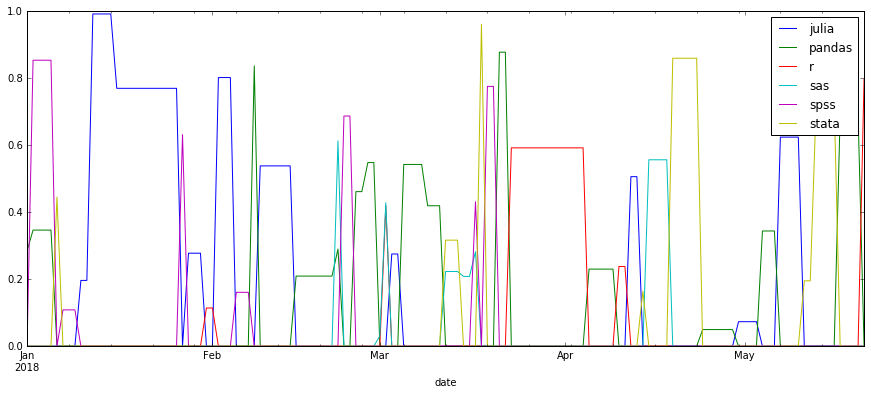

In [28]:
pvt_df.plot(kind='line', figsize=(15,6)).legend(bbox_to_anchor=(1.0, 1.0))

plt.show()

plt.clf()
plt.close()

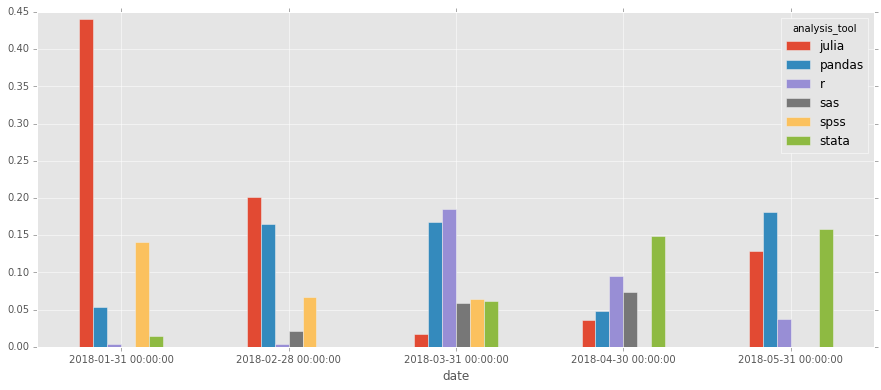

In [29]:
import matplotlib
matplotlib.style.use('ggplot')

pvt_df = pvt_df.resample("M").mean()

pvt_df.plot(kind='bar', figsize=(15,6), rot=0)

plt.show()

plt.clf()
plt.close()

***
## Recognize the Relationship of Series and DataFrame objects
- ** Avoid inefficient wrangling and munging processes due to misunderstanding of objects. **
- ** Instead, appreciating the nature and properties of core objects. **



In [30]:
# PANDAS DATAFRAME = CONTAINER FOR EQUAL LENGTH PANDAS SERIES

#demo_df.apply(lambda col: type(col)).rename('column_type').to_frame()

## Vectorize processes over loop/apply
- ** Avoid iterating across rows and columns for computation needs. **
- ** Instead, run blockwise operations across whole series and dataframe objects. **



In [31]:
date_df = pd.DataFrame()

# FILTER FOR MAY DATES
for dt in pd.date_range('2018-05-01', '2018-05-31', freq='D'):
    tmp = demo_df[demo_df['date']==dt] 
    date_df = date_df.append(tmp, ignore_index=True)

date_df

,date,analysis_tool,num1,database,num2,os,num3,bool
0,2018-05-04,pandas,1.273838,sqlite,0.344150,windows 10,54,True
1,2018-05-07,julia,-260.442372,sql server,0.624550,windows 7,72,True
2,2018-05-11,stata,-62.120205,sqlite,0.195309,windows 10,26,False
3,2018-05-13,stata,-151.799273,db2,0.733028,ios,7,False
4,2018-05-17,pandas,53.714920,mysql,0.690518,ios,11,True
5,2018-05-21,r,-56.021303,oracle,0.797842,windows 10,8,True


In [32]:
date_df = demo_df[demo_df['date'].between('2018-05-01', '2018-05-31')].reset_index(drop=True)

date_df

,date,analysis_tool,num1,database,num2,os,num3,bool
0,2018-05-13,stata,-151.799273,db2,0.733028,ios,7,False
1,2018-05-07,julia,-260.442372,sql server,0.624550,windows 7,72,True
2,2018-05-11,stata,-62.120205,sqlite,0.195309,windows 10,26,False
3,2018-05-21,r,-56.021303,oracle,0.797842,windows 10,8,True
4,2018-05-04,pandas,1.273838,sqlite,0.344150,windows 10,54,True
5,2018-05-17,pandas,53.714920,mysql,0.690518,ios,11,True


***
## Keep Data in Long format not Wide
- ** Avoid inefficient wrangling and munging processes due to shape of data. ***
- ** Instead, "think like a DBA" (long/many rows, indexing, indicators adjacent to values). **



In [33]:
census_df = pd.read_csv('DATA/CHI_CommAreas_Census2010.csv', skiprows=1)

census_df.head(10)

,Geog,GeogKey,Total Population,"Not Hispanic or Latino, White alone","Not Hispanic or Latino, Black or African American alone","Not Hispanic or Latino, American Indian and Alaska Native alone","Not Hispanic or Latino, Asian alone","Not Hispanic or Latino, Native Hawaiian and Other Pacific Islander alone","Not Hispanic or Latino, Some Other Race alone","Not Hispanic or Latino, Two or More Races",...,Median Age,Total Households,Average Household Size,Total Housing Units,Occupied Housing Units,Vacant Housing Units,Occupied Housing Units.1,Owned with a mortgage or a loan,Owned free and clear,Renter occupied
0,Rogers Park,1,54991,21618,14461,142,3523,39,202,1573,...,32.4,24292,2.13,27564,24292,3272,24292,6128,1009,17155
1,West Ridge,2,71942,30706,8015,189,16184,3,225,1919,...,35.1,24755,2.85,27466,24755,2711,24755,8829,3367,12559
2,Uptown,3,56362,29098,11275,191,6414,10,130,1235,...,35.5,29719,1.79,32541,29719,2822,29719,8298,1230,20191
3,Lincoln Square,4,39493,24916,1488,72,4399,11,128,917,...,33.5,18194,2.14,19906,18194,1712,18194,5482,1406,11306
4,North Center,5,31867,24634,738,55,1449,16,51,594,...,32.5,14561,2.18,16197,14561,1636,14561,5805,1147,7609
5,Lake View,6,94368,75845,3651,110,5653,44,140,1727,...,30.4,54425,1.72,59529,54425,5104,54425,16640,3488,34297
6,Lincoln Park,7,64116,53138,2753,54,3296,17,116,1171,...,28.9,33536,1.80,36864,33536,3328,33536,11409,2963,19164
7,Near North Side,8,80484,58033,8732,79,8140,25,163,1338,...,35.2,51714,1.52,62364,51714,10650,51714,17237,5991,28486
8,Edison Park,9,11187,9885,29,3,269,1,8,120,...,41.4,4726,2.37,4964,4726,238,4726,2478,1186,1062
9,Norwood Park,10,37023,30157,164,54,1696,1,38,471,...,43.0,14937,2.44,15848,14937,911,14937,7758,4009,3170


In [34]:
census_df.shape

(77, 67)

In [35]:
gender_df = census_df.filter(regex='Geog|Total|Male|Female', axis=1)
gender_df

,Geog,GeogKey,Total Population,Male: Under 5 years old,Male: 5 to 9 years,Male: 10 to 14 years,Male: 15 to 17 years,Male: 18 and 19 years,Male: 20 years,Male: 21 years,...,Female: 60 and 61 years,Female: 62 to 64 years,Female: 65 and 66 years,Female: 67 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 years and over,Total Households,Total Housing Units
0,Rogers Park,1,54991,1892,1426,1186,816,802,522,554,...,486,661,308,383,534,392,312,388,24292,27564
1,West Ridge,2,71942,2940,2611,2296,1436,856,422,442,...,794,1026,561,718,1056,799,713,931,24755,27466
2,Uptown,3,56362,1453,954,843,547,358,228,303,...,561,679,360,475,763,620,524,690,29719,32541
3,Lincoln Square,4,39493,1313,883,718,465,286,151,198,...,322,493,256,323,436,340,275,316,18194,19906
4,North Center,5,31867,1453,885,486,218,137,95,95,...,261,314,159,218,319,257,181,203,14561,16197
5,Lake View,6,94368,2228,1121,682,338,316,450,533,...,652,962,532,657,861,630,549,780,54425,59529
6,Lincoln Park,7,64116,1600,1032,765,400,1015,625,604,...,543,770,431,532,540,387,345,519,33536,36864
7,Near North Side,8,80484,1339,692,572,373,367,306,400,...,1101,1659,897,1166,1445,1019,802,808,51714,62364
8,Edison Park,9,11187,311,391,342,179,77,40,48,...,141,164,95,147,233,207,205,215,4726,4964
9,Norwood Park,10,37023,1032,1115,1079,613,335,163,171,...,454,641,363,495,763,783,817,1312,14937,15848


In [36]:
gender_df = gender_df.assign(male = gender_df.filter(regex="Male", axis=1).apply(sum, axis=1),
                             female = gender_df.filter(regex="Female", axis=1).apply(sum, axis=1))


gender_long_df = gender_df.filter(regex='Geog|(^male)|female', axis=1)\
                           .melt(id_vars=['Geog', 'GeogKey'], var_name='Gender', value_name='Population')
    
gender_long_df.tail(10)


,Geog,GeogKey,Gender,Population
144,Englewood,68,male,13780
145,Greater Grand Crossing,69,male,14333
146,Ashburn,70,male,19690
147,Auburn Gresham,71,male,21423
148,Beverly,72,male,9558
149,Washington Heights,73,male,11680
150,Mount Greenwood,74,male,9396
151,Morgan Park,75,male,10208
152,O'Hare,76,male,6421
153,Edgewater,77,male,29034


In [37]:
gender_agg_df = gender_long_df.groupby('Gender')['Population']\
                              .agg({'mean', 'median', 'min', 'max', 'sum'})
gender_agg_df.rename(columns={col:col+'_population' for col in gender_agg_df.columns})

,median_population,max_population,sum_population,mean_population,min_population
Gender,,,,,
female,16310,53325,1387526,18019.818182,1485
male,14245,47000,1308072,16987.948052,1286


In [38]:
# TOP 10 MOST POPULOUS NEIGHBORHOODS

top_10_df = gender_long_df.groupby(['Gender'])['Population'].nlargest(10)\
              .to_frame().reset_index().set_index('level_1').rename_axis(None)

grp_df = top_10_df.join(gender_long_df[['Geog']])\
                  .pivot_table(index=['Gender'], columns=['Geog'], values='Population')

grp_df

Geog,Austin,Belmont Cragin,Lake View,Lincoln Park,Logan Square,Near North Side,Portage Park,South Lawndale,West Ridge,West Town
Gender,,,,,,,,,,
female,53325,39134,47368,33686,35986,43147,32787,33893,36420,40178
male,45189,39609,47000,30430,36805,37337,31337,45395,35522,42058


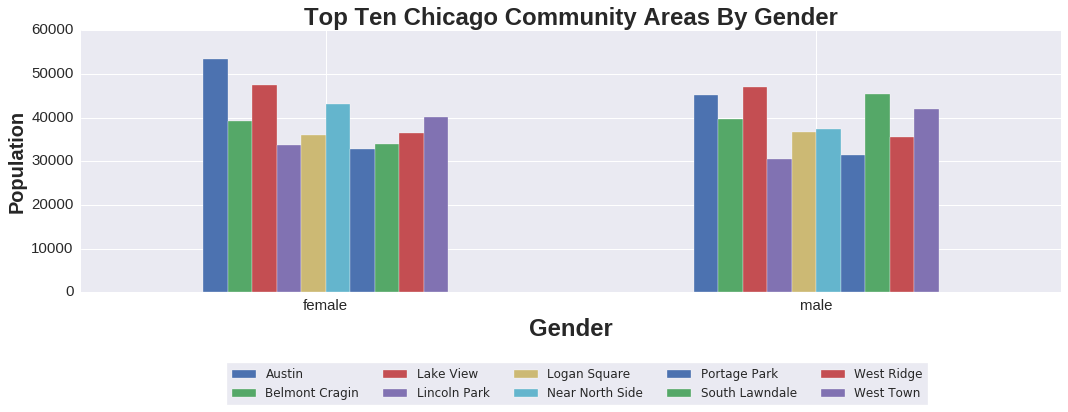

In [39]:
import seaborn as sns

sns.set()

fig = grp_df.plot(kind='bar', edgecolor='w', figsize=(15,5), rot=0, width=0.5, fontsize = 15)

# ADD TITLES, LABELS, RE-ORIENT LEGEND
plt.title('Top Ten Chicago Community Areas By Gender', weight='bold', size=24)
plt.xlabel('Gender', weight='bold', size=24)
plt.ylabel('Population', weight='bold', size=20)
plt.legend(loc='right', ncol=5, frameon=True, shadow=False, prop={'size': 12},
           bbox_to_anchor=(0.87, -0.35))
    
plt.tight_layout()
plt.show()
plt.clf()
plt.close()

***
## Learn when to use basic row and column transformations
- ** Avoid inefficient, long-winded transforms needs by not knowing core methods. **
- ** Instead, learn the direction and outcomes of procedures. **



### [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)

### HORIZONTAL

1. BY NAMED COLUMNS
  - SINGLE DF BY COLS: `pd.merge()`
  - MANY DFs BY COLS: `reduce(lambda x,y: merge(x, y, on='col'), df_list)`

2. BY INDEX
  - SINGLE DF BY INDEX: `pd.join()`
  - MANY DFs BY INDEX: `pd.concat(df_list, axis=1)`
  
- RESHAPE (long to wide): `pd.pivot()`


In [47]:
# MERGE
pd.merge(demo_df.query("analysis_tool == 'pandas'"),demo_df.query("analysis_tool == 'sas'"),
         on = "database", how = "left", suffixes = ['_pd', '_sas']).head()

,date_pd,analysis_tool_pd,num1_pd,database,num2_pd,os_pd,num3_pd,bool_pd,date_sas,analysis_tool_sas,num1_sas,num2_sas,os_sas,num3_sas,bool_sas
0,2018-01-01,pandas,-147.378978,db2,0.284513,debian,59,True,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-09,pandas,84.525485,sql server,0.419493,windows 7,51,True,2018-03-17,sas,-72.907403,0.282253,windows 7,66.0,False
2,2018-03-09,pandas,84.525485,sql server,0.419493,windows 7,51,True,2018-03-02,sas,2.573104,0.428336,windows 10,29.0,False
3,2018-02-08,pandas,220.204327,db2,0.837059,ios,83,True,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-02-25,pandas,-103.699398,db2,0.461672,android,75,True,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# JOIN
demo_df.query("analysis_tool == 'pandas'").reset_index(drop=True)\
    .join(demo_df.query("analysis_tool == 'sas'").reset_index(drop=True),
          how='inner', lsuffix='_pd', rsuffix='_sas')

,date_pd,analysis_tool_pd,num1_pd,database_pd,num2_pd,os_pd,num3_pd,bool_pd,date_sas,analysis_tool_sas,num1_sas,database_sas,num2_sas,os_sas,num3_sas,bool_sas
0,2018-01-01,pandas,-147.378978,db2,0.284513,debian,59,True,2018-03-01,sas,149.028167,sqlite,0.030791,android,73,True
1,2018-03-09,pandas,84.525485,sql server,0.419493,windows 7,51,True,2018-03-12,sas,68.422818,sqlite,0.223199,ubuntu,41,True
2,2018-02-08,pandas,220.204327,db2,0.837059,ios,83,True,2018-02-22,sas,102.520173,mysql,0.613246,windows 10,5,False
3,2018-02-25,pandas,-103.699398,db2,0.461672,android,75,True,2018-03-17,sas,-72.907403,sql server,0.282253,windows 7,66,False
4,2018-04-05,pandas,-84.472197,sql server,0.230288,ubuntu,25,False,2018-03-15,sas,19.871705,postgres,0.208399,mac os,40,False
5,2018-02-15,pandas,-50.845769,mysql,0.209407,mac os,2,True,2018-03-02,sas,2.573104,sql server,0.428336,windows 10,29,False
6,2018-04-24,pandas,-58.061706,mysql,0.049702,windows 7,68,False,2018-04-15,sas,66.723778,postgres,0.556798,windows 10,62,True


### VERTICAL

1. SINGLE DF STACK: `pd.append()`
2. MANY DFs STACK: `pd.concat(df_list, axis=0)`
3. RESHAPE (from wide): `pd.melt()`, `pd.wide_to_long()`

In [42]:
# APPEND
demo_df.query("analysis_tool == 'pandas'").append(demo_df.query("analysis_tool == 'sas'"), ignore_index=True)

,date,analysis_tool,num1,database,num2,os,num3,bool
0,2018-01-01,pandas,-147.378978,db2,0.284513,debian,59,True
1,2018-03-09,pandas,84.525485,sql server,0.419493,windows 7,51,True
2,2018-02-08,pandas,220.204327,db2,0.837059,ios,83,True
3,2018-02-25,pandas,-103.699398,db2,0.461672,android,75,True
4,2018-04-05,pandas,-84.472197,sql server,0.230288,ubuntu,25,False
5,2018-02-15,pandas,-50.845769,mysql,0.209407,mac os,2,True
6,2018-04-24,pandas,-58.061706,mysql,0.049702,windows 7,68,False
7,2018-05-04,pandas,1.273838,sqlite,0.344150,windows 10,54,True
8,2018-02-27,pandas,20.013363,sqlite,0.548549,android,37,True
9,2018-03-05,pandas,79.660529,db2,0.542860,windows 7,87,False


In [43]:
# CONCAT
pd.concat([demo_df.query("analysis_tool == 'pandas'"),
           demo_df.query("analysis_tool == 'julia'"),
           demo_df.query("analysis_tool == 'sas'")], ignore_index=True)

,date,analysis_tool,num1,database,num2,os,num3,bool
0,2018-01-01,pandas,-147.378978,db2,0.284513,debian,59,True
1,2018-03-09,pandas,84.525485,sql server,0.419493,windows 7,51,True
2,2018-02-08,pandas,220.204327,db2,0.837059,ios,83,True
3,2018-02-25,pandas,-103.699398,db2,0.461672,android,75,True
4,2018-04-05,pandas,-84.472197,sql server,0.230288,ubuntu,25,False
5,2018-02-15,pandas,-50.845769,mysql,0.209407,mac os,2,True
6,2018-04-24,pandas,-58.061706,mysql,0.049702,windows 7,68,False
7,2018-05-04,pandas,1.273838,sqlite,0.344150,windows 10,54,True
8,2018-02-27,pandas,20.013363,sqlite,0.548549,android,37,True
9,2018-03-05,pandas,79.660529,db2,0.542860,windows 7,87,False


In [44]:
# GRAPHING PLOT
pvt_df

analysis_tool,julia,pandas,r,sas,spss,stata
date,,,,,,
2018-01-31,0.440940,0.053929,0.003682,0.000000,0.141099,0.014372
2018-02-28,0.201378,0.164770,0.004077,0.021902,0.066352,0.000000
2018-03-31,0.017770,0.167304,0.185528,0.058961,0.063984,0.061679
2018-04-30,0.036201,0.048322,0.094860,0.074240,0.000000,0.148833
2018-05-31,0.129422,0.180692,0.037992,0.000000,0.000000,0.158225


In [45]:
# MELT
pvt_df.reset_index().melt(id_vars='date', var_name='analysis_tool', value_name='month_mean')

,date,analysis_tool,month_mean
0,2018-01-31,julia,0.440940
1,2018-02-28,julia,0.201378
2,2018-03-31,julia,0.017770
3,2018-04-30,julia,0.036201
4,2018-05-31,julia,0.129422
5,2018-01-31,pandas,0.053929
6,2018-02-28,pandas,0.164770
7,2018-03-31,pandas,0.167304
8,2018-04-30,pandas,0.048322
9,2018-05-31,pandas,0.180692


***
## Tour current, live pandas questions

### https://stackoverflow.com/questions/tagged/pandas